# Comparison of Model Performanance

## Fill Metrics Dataframe

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
models = np.array(['Logistic Regression - Baseline', 'Logistic Regression with SMOTE',
         'Decision Tree', 'Random Forest', 'XGBoost', 'Random Forest - Tuned',
         'Random Forest - Tuned with High Cardinality', 'Random Forest Tuned with SMOTENC'])

In [2]:
recall_functional = np.array([0.91, 0.59, 0.74, 0.78, 0.69, 0.76, 0.79, 0.74])

In [3]:
recall_repair = np.array([0.01, 0.65, 0.46, 0.48, 0.57, 0.56, 0.65, 0.59])

In [4]:
recall_non_functional = np.array([0.62, 0.61, 0.7, 0.75, 0.61, 0.74, 0.52, 0.74])

In [5]:
train_acc = np.array([0.74, 0.61, 0.91, 0.91, 0.66, 0.81, 0.7, 0.79])

In [6]:
test_acc = np.array([0.73, 0.6, 0.71, 0.75, 0.65, 0.74, 0.68, 0.73])

In [7]:
auc_mean = np.array([0.66, 0.71, 0.74, 0.77, 0.72, 0.77, 0.74, 0.77])

In [20]:
columns = np.array(['model', 'Recall - Functional', 'Recall - Functional Needs Repairs', 
                   'Recall - Non Functional', 'Training Accuracy', 'Test Accuracy',
                   'Mean AUC'])

In [25]:
model_metrics = pd.DataFrame(np.array([models, recall_functional, recall_repair, 
                             recall_non_functional, train_acc, test_acc, auc_mean]).T,
                            columns=columns)

In [51]:
for col in list(model_metrics.columns[1:]):
    model_metrics[col] = model_metrics[col].astype(float)

# Metrics Dataframe

In [22]:
model_metrics

,model,Recall - Functional,Recall - Functional Needs Repairs,Recall - Non Functional,Training Accuracy,Test Accuracy,Mean AUC
0,Logistic Regression - Baseline,0.91,0.01,0.62,0.74,0.73,0.66
1,Logistic Regression with SMOTE,0.59,0.65,0.61,0.61,0.6,0.71
2,Decision Tree,0.74,0.46,0.7,0.91,0.71,0.74
3,Random Forest,0.78,0.48,0.75,0.91,0.75,0.77
4,XGBoost,0.69,0.57,0.61,0.66,0.65,0.72
5,Random Forest - Tuned,0.76,0.56,0.74,0.81,0.74,0.77
6,Random Forest - Tuned with High Cardinality,0.79,0.65,0.52,0.7,0.68,0.74
7,Random Forest Tuned with SMOTENC,0.74,0.59,0.74,0.79,0.73,0.77


# Plots of Each Metric

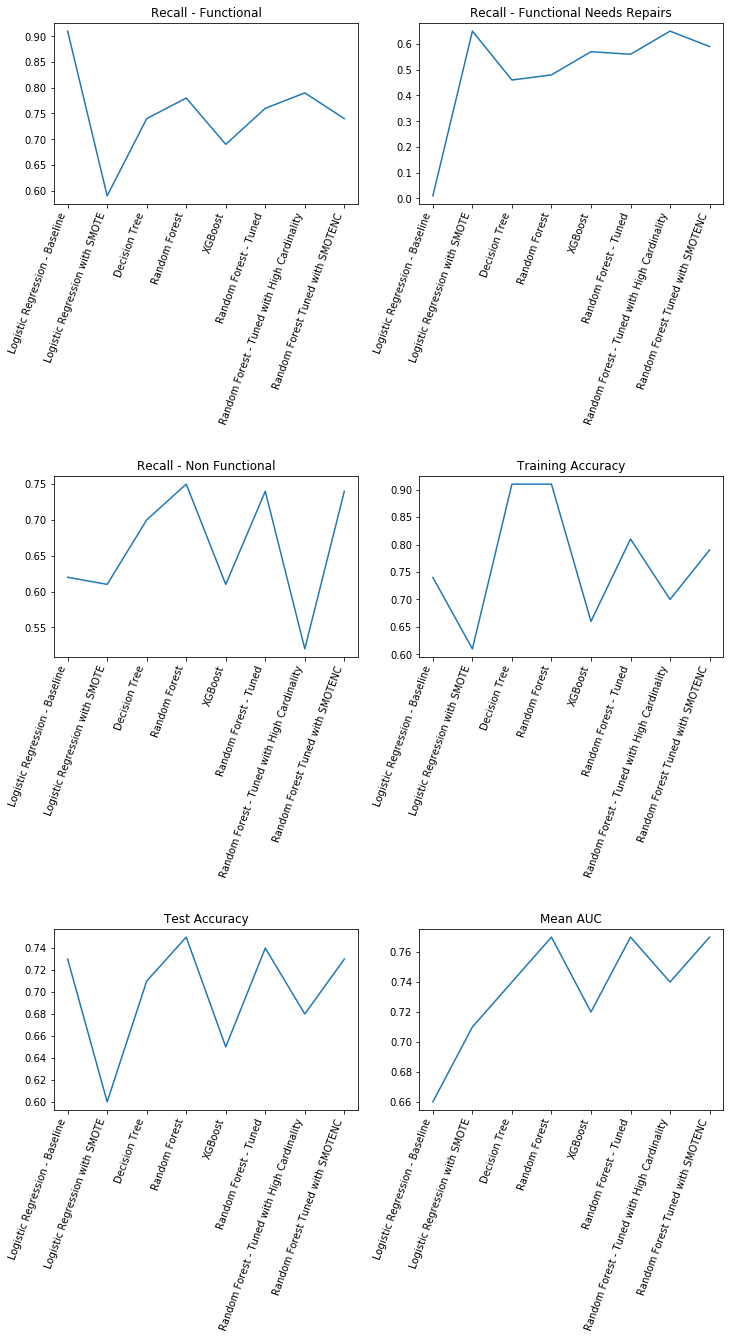

In [96]:
fig, axs = plt.subplots(3, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=1.5)
for ax, col in zip(axs.flatten(), list(model_metrics.columns[1:])):
    ax.plot(model_metrics['model'], model_metrics[col])
    ax.set_xticklabels(labels=model_metrics['model'], rotation=70, ha='right') # 
    ax.set_title(col)

# Plot of Training vs. Test Accuracy

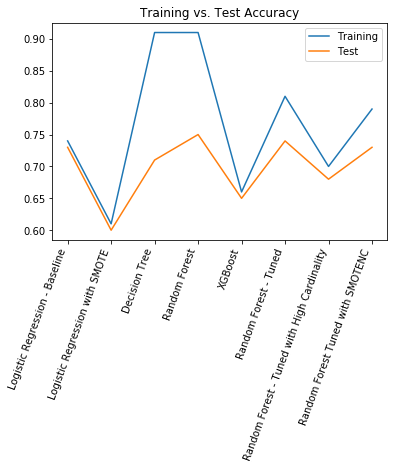

In [101]:
plt.plot(model_metrics['model'], model_metrics['Training Accuracy'], label='Training')
plt.plot(model_metrics['model'], model_metrics['Test Accuracy'], label='Test')
plt.xticks(rotation=70, ha='right') 
plt.title('Training vs. Test Accuracy')
plt.legend();

# Summary

The models were evaluated primarily on the balance Recall of each class, and the test accuracy. The training accuracy was consulted to check for overfitting, and the Mean AUC was checked as an additional metric of performance.

The initial models were fitted in the order of Baseline, to Logistic Regression with SMOTE, to Decision Tree, Random Forest, then XGBoost.  Random Forest was the most promising although it was overfitted to the training data.

Since the Random Forest looked to be the best performing, it was chosen to have its hyperparameters tuned.  They were tuned in an attempt to reduce the overfitting, to better balance the Recall of the three classes, and to improve or increase the accuracy.  In the end the tuned Random Forest Classifier using SMOTENC synthetic oversampling that performed the best.  It did not have the highest of every metric, but it had the highest balanced recall,  a high accuracy and a mean AUC the was tied for the highest.